In [17]:
!pip install pandas
!pip install matplotlib
!pip install keras
!pip install tensorflow==1.14.0

  ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==1.14.0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

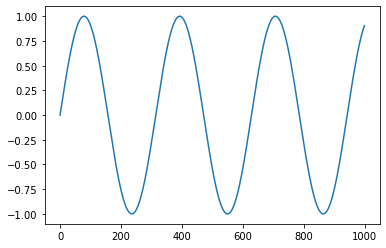

In [3]:
N = 1000    
Tp = 700    

t=np.arange(0,N)
x=np.sin(0.02*t)
df = pd.DataFrame(x)
plt.plot(df)
plt.show()

In [4]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [5]:
step = 4
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [14]:
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
print(trainX)

[[0.         0.01999867 0.03998933 0.05996401]
 [0.01999867 0.03998933 0.05996401 0.07991469]
 [0.03998933 0.05996401 0.07991469 0.09983342]
 ...
 [0.98062549 0.98434695 0.98767468 0.98767468]
 [0.98434695 0.98767468 0.98767468 0.98767468]
 [0.98767468 0.98767468 0.98767468 0.98767468]]


In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(700, 1, 4)

In [16]:
trainY.shape

(700,)

In [9]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 0.2705
Epoch 2/100
 - 0s - loss: 0.0689
Epoch 3/100
 - 0s - loss: 0.0094
Epoch 4/100
 - 0s - loss: 0.0024
Epoch 5/100
 - 0s - loss: 0.0013
Epoch 6/100
 - 0s - loss: 9.6402e-04
Epoch 7/100
 - 0s - loss: 9.2978e-04
Epoch 8/100
 - 0s - loss: 8.6487e-04
Epoch 9/100
 - 0s - loss: 8.2712e-04
Epoch 10/100
 - 0s - loss: 8.1199e-04
Epoch 11/100
 - 0s - loss: 7.6006e-04
Epoch 12/100
 - 0s - loss: 7.4809e-04
Epoch 13/100
 - 0s - loss: 6.7624e-04
Epoch 14/100
 - 0s - loss: 6.3420e-04
Epoch 15/100
 - 0s - loss: 6.1073e-04
Epoch 16/100
 - 0s - loss: 5.5889e-04
Epoch 17/100
 - 0s - loss: 5.1425e-04
Epoch 18/100
 - 0s - loss: 4.7440e-04
Epoch 19/100
 - 0s - loss: 4.3334e-04
Epoch 20/100
 - 0s - loss: 3.7174e-04
Epoch 21/100
 - 0s - loss: 3.5104e-04
Epoch 22/100
 - 0s - loss: 3.2777e-04
Epoch 23/100
 - 0s - loss: 2.9689e-04
Epoch 24/100
 - 0s - loss: 2.9219e-04
Epoch 25/100
 - 0s - loss: 2.5846e-04
Epoch 26/100
 - 0s - loss: 2.38

In [25]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)


8.692150110748897e-06
[[ 7.98605084e-02]
 [ 1.00800738e-01]
 [ 1.21081695e-01]
 [ 1.41315669e-01]
 [ 1.61494583e-01]
 [ 1.81201816e-01]
 [ 2.00660199e-01]
 [ 2.20041156e-01]
 [ 2.39337027e-01]
 [ 2.58539945e-01]
 [ 2.77642369e-01]
 [ 2.96636552e-01]
 [ 3.15515012e-01]
 [ 3.34270060e-01]
 [ 3.52894276e-01]
 [ 3.71380210e-01]
 [ 3.89720470e-01]
 [ 4.07907635e-01]
 [ 4.25934553e-01]
 [ 4.43793952e-01]
 [ 4.61478680e-01]
 [ 4.78981763e-01]
 [ 4.96296078e-01]
 [ 5.13414681e-01]
 [ 5.30330837e-01]
 [ 5.47037661e-01]
 [ 5.63528538e-01]
 [ 5.79461455e-01]
 [ 5.95133483e-01]
 [ 6.10951900e-01]
 [ 6.26927376e-01]
 [ 6.42651796e-01]
 [ 6.58119023e-01]
 [ 6.73322737e-01]
 [ 6.88257039e-01]
 [ 7.02915788e-01]
 [ 7.17293143e-01]
 [ 7.31383383e-01]
 [ 7.45180905e-01]
 [ 7.58680105e-01]
 [ 7.71875560e-01]
 [ 7.84762144e-01]
 [ 7.97334671e-01]
 [ 8.09587896e-01]
 [ 8.21246862e-01]
 [ 8.32027853e-01]
 [ 8.42505932e-01]
 [ 8.52676749e-01]
 [ 8.62536490e-01]
 [ 8.72081101e-01]
 [ 8.81306827e-01]
 [ 8.9020

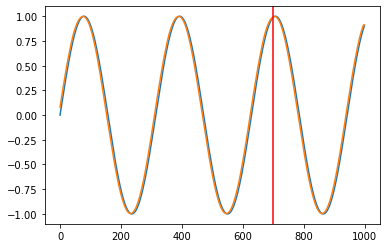

In [12]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()